<a href="https://colab.research.google.com/github/ShaliniAnandaPhD/HarmonyLens/blob/main/Harmony_Lens_Collaboration_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- The code allows testing resolution strategies without real-world risks by randomly generating hypothetical scenarios and assessing negotiation outcomes in the run_simulation function. Different strategy effectiveness levels and relationship qualities can be set to explore their impact.

- Insight into influential factors is gained by visualizing inputs like conflict level and outputs like negotiated agreements. Their correlation and variability is quantitatively shown in visualize_simulation_results. This reveals dynamics between relationships, proposals, and outcomes.

- More informed decisions can follow these simulations by analyzing the range of generated scenarios. The effects of enhancing relationships or strategy efficacy is directly seen by comparing across the randomized instances.

- Negotiator behaviors are explored by incorporating random events through event flags and conflict modifications. The simulations can reveal how surprise disruptions alter negotiated outcomes in the model.

- A large batch of scenarios is efficiently created and evaluated, as shown by the 20 instantiations simulated. This allows assessment of general trends rather than case-specific anomalies in what drives successful conflict resolution.

In summary, features like randomized data, adjustable parameters, quantitative analysis, and batch efficiency make this coding framework well-suited to illuminating patterns that can inform more effective negotiation preparation, policies, and training.

In [8]:
import random
import matplotlib.pyplot as plt
import numpy as np


In [9]:
def generate_synthetic_data(num_scenarios):
    scenarios = []
    for _ in range(num_scenarios):
        conflict_level = random.randint(1, 10)
        strategy_effectiveness = random.randint(1, 10)
        relationship_level = random.randint(1, 10)
        random_event = random.choice([0, 1])
        scenarios.append((conflict_level, strategy_effectiveness, relationship_level, random_event))
    return scenarios



In [10]:
def run_simulation(scenarios):
    outcomes = []
    for conflict, strategy, relationship, event in scenarios:
        adjusted_strategy = strategy + (relationship / 10)
        if event:
            conflict += random.randint(-2, 2)
        outcome = adjusted_strategy - conflict
        outcomes.append(outcome)
    return outcomes



In [11]:
def visualize_simulation_results(scenarios, outcomes):
    x = np.arange(len(scenarios))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width, [conflict for conflict, _, _, _ in scenarios], width, label='Conflict Level')
    ax.bar(x, [strategy for _, strategy, _, _ in scenarios], width, label='Strategy Effectiveness')
    ax.bar(x + width, [relationship for _, _, relationship, _ in scenarios], width, label='Relationship Level')
    outcome_colors = ['green' if outcome >= 0 else 'red' for outcome in outcomes]
    ax.bar(x + width * 2, outcomes, width, color=outcome_colors, label='Outcome')

    ax.set_xlabel('Scenario Number')
    ax.set_ylabel('Levels and Outcomes')
    ax.set_title('Enhanced Negotiation Scenario Simulation')
    ax.set_xticks(x)
    ax.set_xticklabels(range(1, len(scenarios) + 1))
    ax.legend()

    fig.tight_layout()
    plt.show()



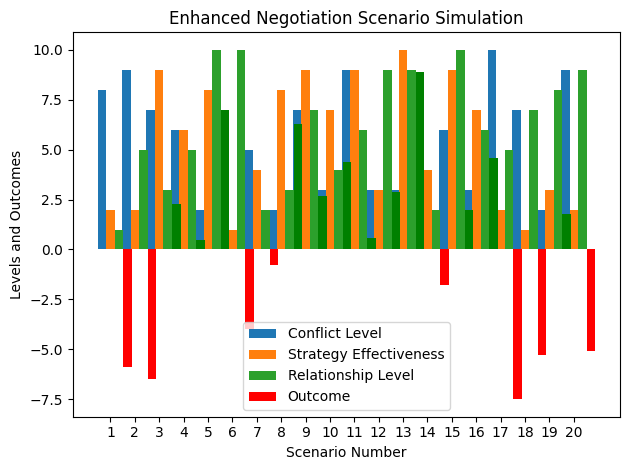

In [12]:
num_scenarios = 20  # Define the number of scenarios
synthetic_scenarios = generate_synthetic_data(num_scenarios)
simulation_outcomes = run_simulation(synthetic_scenarios)
visualize_simulation_results(synthetic_scenarios, simulation_outcomes)

